## 模块零：

In [66]:
import importlib
import sys
import os
dir_path = os.path.dirname(os.getcwd())
sys.path.append(dir_path)

import datetime
import pandas as pd
import numpy as np
import featureExtration
from visualization.Visualization import MidSpanData
import utils
import matplotlib.pyplot as plt

# 4月27日数据

#### 模块一：选取用于做频谱分析的时段

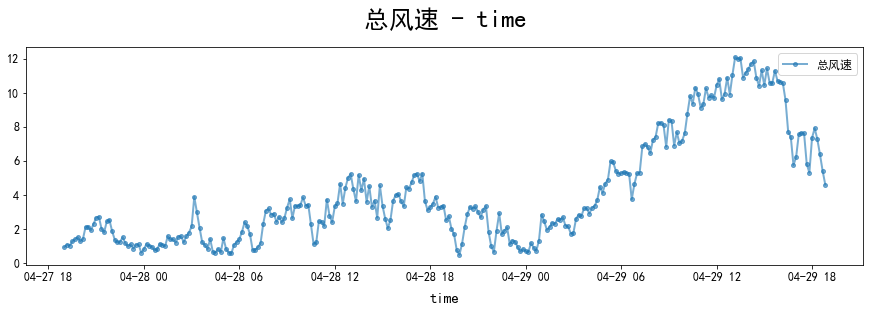

In [3]:
midSpanData = MidSpanData(date='4.27')  # - data = '4.27' 或 '5.4'
# 做时域图
x = 'time'
y = '总风速'
midSpanData.show(x, y)

In [42]:
# 选取三段数据, 
    # 大风前：4.28 01:00 - 4.28 00:10
    # 风速最大时 4.29 13:00 - 4.29 13:10
    # 大风后：4.29 18:00 - 4.29 18:10
timePoint_1 = datetime.datetime(2021, 4, 28, 1, 0, 0)
timePoint_2 = utils.getMaxWindSpedTime('4.27')
timePoint_3 = datetime.datetime(2021, 4, 29, 18, 50, 0)

# 查看三个时间点的风速
print("{0} 时刻风速：{1}".format(timePoint_1, utils.getWindSped(timePoint_1, '4.27')))
print("{0} 时刻风速：{1}".format(timePoint_2, utils.getWindSped(timePoint_2, '4.27')))
print("{0} 时刻风速：{1}".format(timePoint_3, utils.getWindSped(timePoint_3, '4.27')))

2021-04-28 01:00:00 时刻风速：1.1148722333266252
2021-04-29 13:10:00 时刻风速：12.074515139761886
2021-04-29 18:50:00 时刻风速：4.58791850228073


In [41]:
data_1 = utils.getWindowData(timePoint_1, '4.27', type='跨中横向加速度', duration=10).values
print(data_1)

缺失值情况：
加速度    80
dtype: int64
[[ 4.09994807e-07]
 [-4.79872738e-05]
 [ 2.60429723e-05]
 ...
 [-9.80251602e-05]
 [ 2.49365398e-04]
 [ 3.38927124e-04]]


In [6]:
data_2 = utils.getWindowData(timePoint_2, '4.27', type='跨中横向加速度', duration=10).values
print(data_2)

缺失值情况：
加速度    120
dtype: int64
[[-0.00077927]
 [-0.00072591]
 [-0.00130958]
 ...
 [-0.00347914]
 [-0.00328569]
 [-0.00411024]]


In [43]:
data_3 = utils.getWindowData(timePoint_3, '4.27', type='跨中横向加速度', duration=10).values
print(data_3)

缺失值情况：
加速度    120
dtype: int64
[[-0.00146628]
 [ 0.00083058]
 [ 0.0003992 ]
 ...
 [ 0.00074735]
 [ 0.00146273]
 [ 0.00171194]]


#### 模块二：作频谱图

In [30]:
importlib.reload(featureExtration)

<module 'featureExtration' from 'd:\\Study\\TJU\\科研\\结构健康检测\\数据\\浦仪夹江大桥数据可视化\\timeFreq_analysis\\featureExtration.py'>

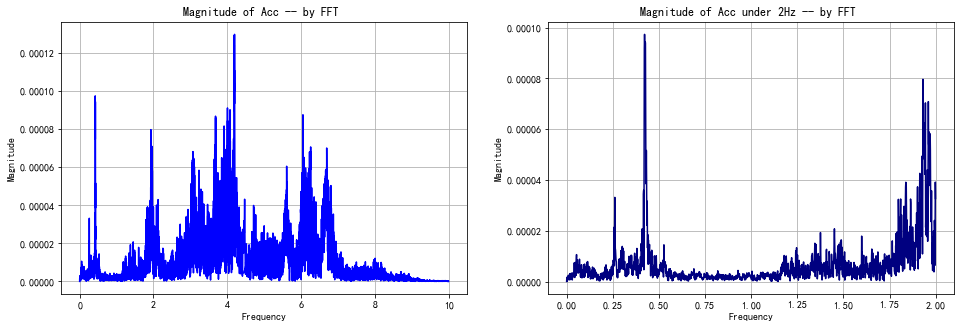

In [60]:
# 大风前频谱图
fs = 20
Freq, FFT_y1, Freq_le_2Hz, FFT_y1_le_2Hz_1 = featureExtration.featureExtration(data=data_1.reshape(-1), fs=fs).getFreqSpectrum()

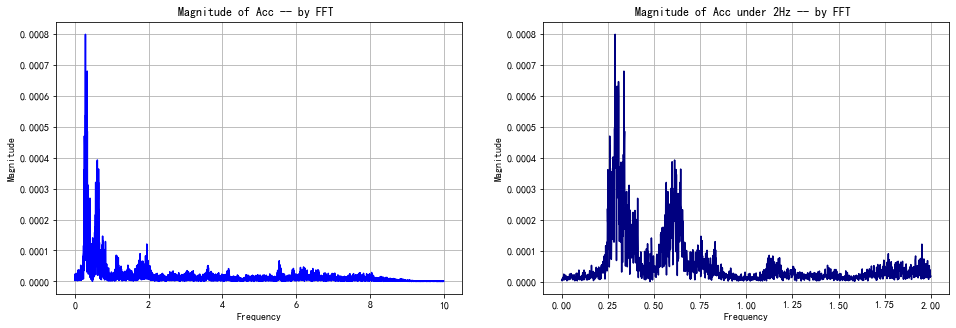

In [61]:
# 大风时频谱图
Freq, FFT_y1, Freq_le_2Hz, FFT_y1_le_2Hz_2 = featureExtration.featureExtration(data=data_2.reshape(-1), fs=fs).getFreqSpectrum()

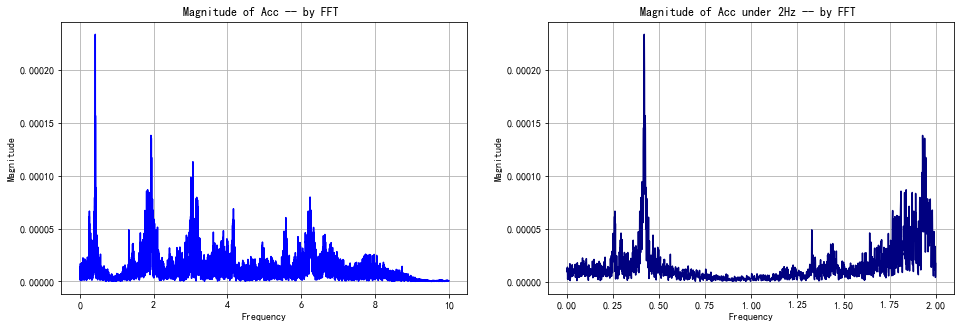

In [62]:
# 大风后频谱图
Freq, FFT_y1, Freq_le_2Hz, FFT_y1_le_2Hz_3 = featureExtration.featureExtration(data=data_3.reshape(-1), fs=fs).getFreqSpectrum()

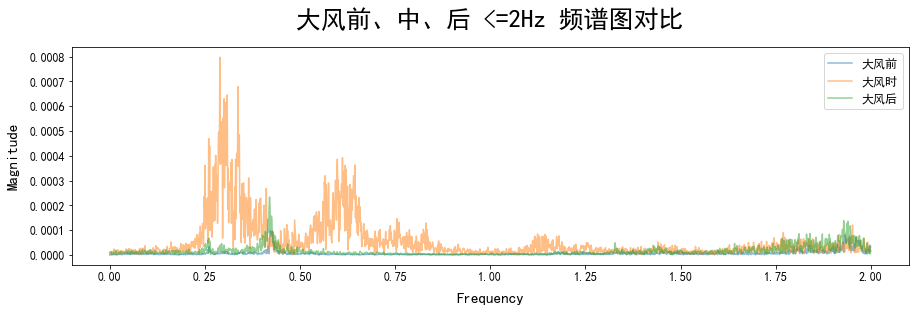

In [74]:
# 对三分数据进行共同展示
plt.rcParams['font.sans-serif'] = ['Simhei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15, 4))

plt.plot( Freq_le_2Hz, FFT_y1_le_2Hz_1, label='大风前', alpha=0.5)
plt.plot( Freq_le_2Hz, FFT_y1_le_2Hz_2, label='大风时', alpha=0.5)
plt.plot( Freq_le_2Hz, FFT_y1_le_2Hz_3, label='大风后', alpha=0.5)

# 设置坐标轴刻度的大小
plt.tick_params(labelsize=12)
# 设置注释
plt.legend(loc="best", fontsize=12)
# 设置标题
plt.title('大风前、中、后 <=2Hz 频谱图对比', fontsize=25, pad=20)
# 设置横坐标标题
plt.xlabel('Frequency', fontsize=15, labelpad=10)
plt.ylabel('Magnitude', fontsize=15, labelpad=10)
plt.show()

# 5月4日数据

#### 模块一：选取用于做频谱分析的时段

In [47]:
midSpanData = MidSpanData(date='5.4')  # - data = '4.27' 或 '5.4'

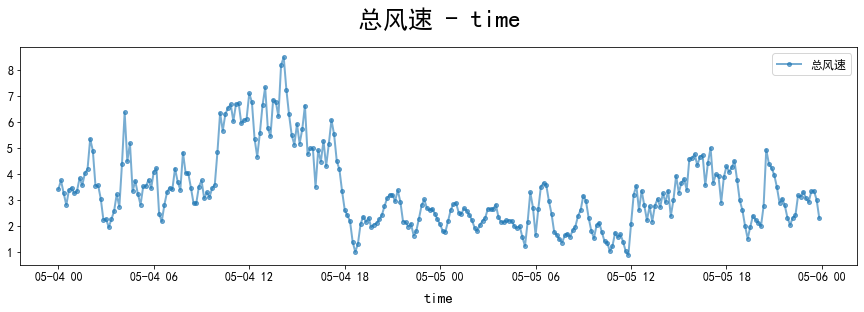

In [48]:
# 做时域图
x = 'time'
y = '总风速'
midSpanData.show(x, y)

In [50]:
# 选取三段数据, 
    # 大风前：4.28 01:00 - 4.28 00:10
    # 风速最大时 4.29 13:00 - 4.29 13:10
    # 大风后：4.29 18:00 - 4.29 18:10
timePoint_1_May4 = datetime.datetime(2021, 5, 4, 3, 0, 0)
timePoint_2_May4 = utils.getMaxWindSpedTime('5.4')
timePoint_3_May4 = datetime.datetime(2021, 5, 5, 0, 0, 0)

# 查看三个时间点的风速
print("{0} 时刻风速：{1}".format(timePoint_1, utils.getWindSped(timePoint_1_May4, '5.4')))
print("{0} 时刻风速：{1}".format(timePoint_2, utils.getWindSped(timePoint_2_May4, '5.4')))
print("{0} 时刻风速：{1}".format(timePoint_3, utils.getWindSped(timePoint_3_May4, '5.4')))

2021-05-04 03:00:00 时刻风速：2.2671617098196206
2021-05-04 14:10:00 时刻风速：8.507240688928128
2021-05-05 00:00:00 时刻风速：2.0587886875876227


In [51]:
data_1_May4 = utils.getWindowData(timePoint_1_May4, '5.4', type='跨中横向加速度', duration=10).values
data_1_May4 = data_1_May4[:,1]
print(data_1_May4)

D:\Apps\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


缺失值情况：
index      0
加速度      140
dtype: int64
[[ 0.00000000e+00  7.99728291e-05]
 [ 1.00000000e+00 -4.22882182e-05]
 [ 2.00000000e+00 -3.12536529e-04]
 ...
 [ 1.80000000e+01 -8.31748758e-05]
 [ 1.90000000e+01 -1.37465500e-03]
 [ 0.00000000e+00 -1.89207414e-03]]


D:\Apps\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
D:\Apps\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [52]:
data_2_May4 = utils.getWindowData(timePoint_2_May4, '5.4', type='跨中横向加速度', duration=10).values
data_2_May4 = data_2_May4[:,1]
print(data_2_May4)

缺失值情况：
index      0
加速度      140
dtype: int64
[[0.00000000e+00 2.79309068e-04]
 [1.00000000e+00 3.07230439e-04]
 [2.00000000e+00 5.74725866e-04]
 ...
 [1.80000000e+01 5.20168032e-04]
 [1.90000000e+01 9.34251717e-04]
 [0.00000000e+00 6.64005109e-04]]


In [53]:
data_3_May4 = utils.getWindowData(timePoint_3_May4, '5.4', type='跨中横向加速度', duration=10).values
data_3_May4 = data_3_May4[:,1]
print(data_3_May4)

缺失值情况：
index     0
加速度      20
dtype: int64
[[ 0.00000000e+00 -7.91950630e-04]
 [ 1.00000000e+00  4.23333049e-04]
 [ 2.00000000e+00  6.66924460e-04]
 ...
 [ 1.80000000e+01  1.14453251e-04]
 [ 1.90000000e+01  4.63086593e-04]
 [ 0.00000000e+00  4.05924874e-04]]


#### 模块二：作频谱图

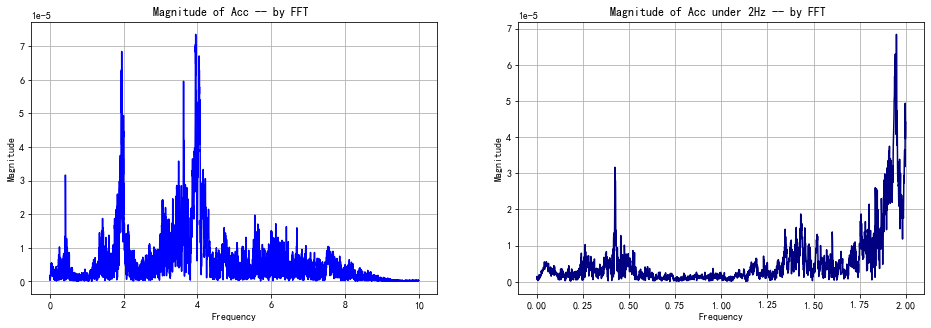

In [69]:
# 大风前频谱图
fs = 20
Freq, FFT_y1, Freq_le_2Hz_May4, FFT_y1_le_2Hz_May4_1 = featureExtration.featureExtration(data=data_1_May4, fs=fs).getFreqSpectrum()

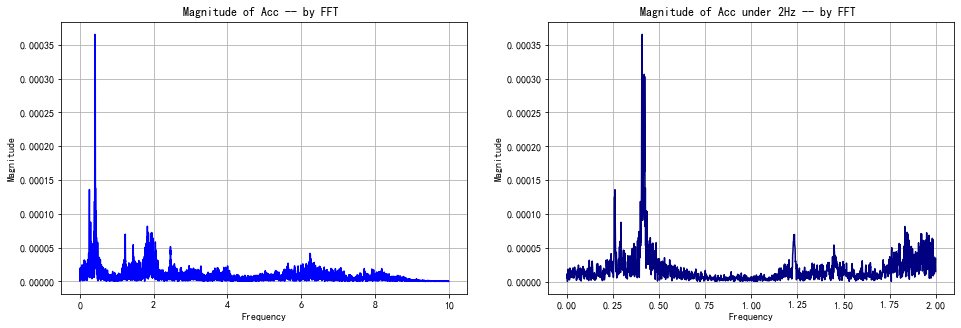

In [70]:
# 大风时频谱图
fs = 20
Freq, FFT_y1, Freq_le_2Hz_May4, FFT_y1_le_2Hz_May4_2 = featureExtration.featureExtration(data=data_2_May4, fs=fs).getFreqSpectrum()

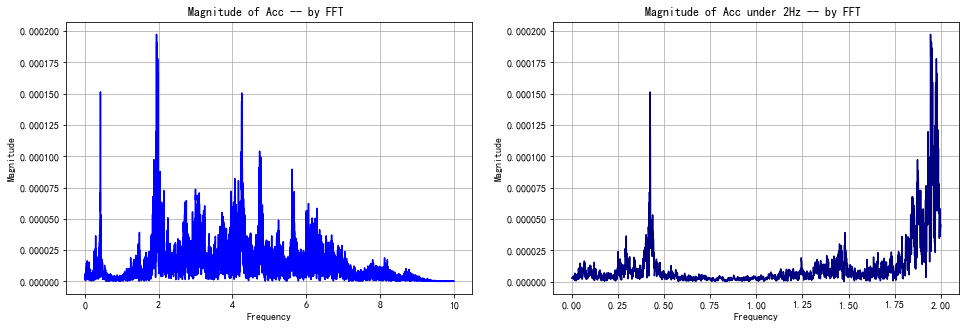

In [71]:
# 大风后频谱图
fs = 20
Freq, FFT_y1, Freq_le_2Hz_May4, FFT_y1_le_2Hz_May4_3 = featureExtration.featureExtration(data=data_3_May4, fs=fs).getFreqSpectrum()

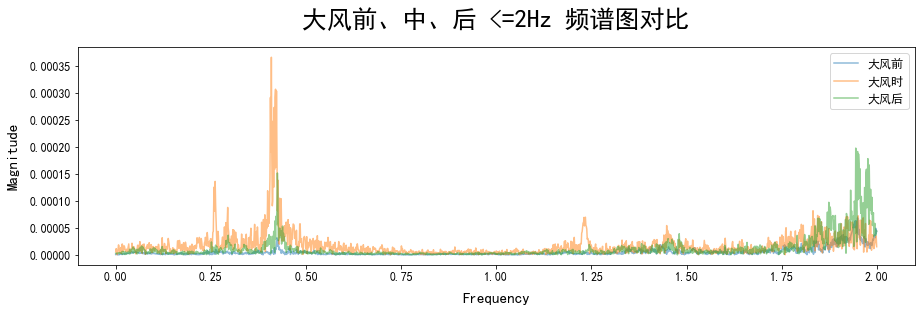

In [73]:
# 对三分数据进行共同展示
plt.rcParams['font.sans-serif'] = ['Simhei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15, 4))

plt.plot( Freq_le_2Hz_May4, FFT_y1_le_2Hz_May4_1, label='大风前', alpha=0.5)
plt.plot( Freq_le_2Hz_May4, FFT_y1_le_2Hz_May4_2, label='大风时', alpha=0.5)
plt.plot( Freq_le_2Hz_May4, FFT_y1_le_2Hz_May4_3, label='大风后', alpha=0.5)

# 设置坐标轴刻度的大小
plt.tick_params(labelsize=12)
# 设置注释
plt.legend(loc="best", fontsize=12)
# 设置标题
plt.title('大风前、中、后 <=2Hz 频谱图对比', fontsize=25, pad=20)
# 设置横坐标标题
plt.xlabel('Frequency', fontsize=15, labelpad=10)
plt.ylabel('Magnitude', fontsize=15, labelpad=10)
plt.show()